# PetFinder.my Adoption Prediction
https://www.kaggle.com/c/petfinder-adoption-prediction

## Data description

### File descriptions

    train.csv - Tabular/text data for the training set
    test.csv - Tabular/text data for the test set
    sample_submission.csv - A sample submission file in the correct format
    breed_labels.csv - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.
    color_labels.csv - Contains ColorName for each ColorID
    state_labels.csv - Contains StateName for each StateID
    
    
### Data Fields

    PetID - Unique hash ID of pet profile
    AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
    Type - Type of animal (1 = Dog, 2 = Cat)
    Name - Name of pet (Empty if not named)
    Age - Age of pet when listed, in months
    Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
    Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
    Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
    Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
    Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
    Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
    MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
    FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
    Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
    Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
    Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
    Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
    Quantity - Number of pets represented in profile
    Fee - Adoption fee (0 = Free)
    State - State location in Malaysia (Refer to StateLabels dictionary)
    RescuerID - Unique hash ID of rescuer
    VideoAmt - Total uploaded videos for this pet
    PhotoAmt - Total uploaded photos for this pet
    Description - Profile write-up for this pet. The primary language used is English, with some in Malay/Chinese

### AdoptionSpeed

Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:
    0 - Pet was adopted on the same day as it was listed.
    1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
    2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
    3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
    4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days). 
    
    
### Images

For pets that have photos, they will be named in the format of PetID-ImageNumber.jpg. Image 1 is the profile (default) photo set for the pet. For privacy purposes, faces, phone numbers and emails have been masked.
Image Metadata

We have run the images through Google's Vision API, providing analysis on Face Annotation, Label Annotation, Text Annotation and Image Properties. You may optionally utilize this supplementary information for your image analysis.

File name format is PetID-ImageNumber.json.

Some properties will not exist in JSON file if not present, i.e. Face Annotation. Text Annotation has been simplified to just 1 entry of the entire text description (instead of the detailed JSON result broken down by individual characters and words). Phone numbers and emails are already anonymized in Text Annotation.

Google Vision API reference: https://cloud.google.com/vision/docs/reference/rest/v1/images/annotate


### Sentiment Data

We have run each pet profile's description through Google's Natural Language API, providing analysis on sentiment and key entities. You may optionally utilize this supplementary information for your pet description analysis. There are some descriptions that the API could not analyze. As such, there are fewer sentiment files than there are rows in the dataset.

File name format is PetID.json.

Google Natural Language API reference: https://cloud.google.com/natural-language/docs/basics

## First look at the data

### Library import

In [1]:
# Library import 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import tensorflow as tf

% matplotlib inline

In [2]:
# Unzipping the relevant files
# ONE-TIME EXERCISE ONLY

"""from zipfile import ZipFile

os.makedirs('train')
train_zf = ZipFile('train.zip', 'r')
train_zf.extractall('train')
train_zf.close()
totals_train = 0
for root, dirs, files in os.walk('train'): 
    totals_train += len(files)
print('There are %d total train csvs.' % totals_train)

os.makedirs('test')
test_zf = ZipFile('test.zip', 'r')
test_zf.extractall('test')
test_zf.close()
totals_test = 0
for root, dirs, files in os.walk('test'): 
    totals_test += len(files)
print('There are %d total test csvs.' % totals_test)
    
os.makedirs('test_images')
testimg_zf = ZipFile('test_images.zip', 'r')
testimg_zf.extractall('test_images')
testimg_zf.close()
totals_testimg = 0
for root, dirs, files in os.walk('test_images'): 
    totals_testimg += len(files)
print('There are %d total test images.' % totals_testimg)
    
os.makedirs('test_metadata')
testmeta_zf = ZipFile('test_metadata.zip', 'r')
testmeta_zf.extractall('test_metadata')
testmeta_zf.close()
totals_testmeta = 0
for root, dirs, files in os.walk('test_metadata'): 
    totals_testmeta += len(files)
print('There are %d total test meta files.' % totals_testmeta)
    
os.makedirs('test_sentiment')
testsent_zf = ZipFile('test_sentiment.zip', 'r')
testsent_zf.extractall('test_sentiment')
testsent_zf.close()
totals_testsent = 0
for root, dirs, files in os.walk('test_sentiment'): 
    totals_testsent += len(files)
print('There are %d total test sentiments.' % totals_testsent)
    
os.makedirs('train_images')
trainimg_zf = ZipFile('train_images.zip', 'r')
trainimg_zf.extractall('train_images')
trainimg_zf.close()
totals_trainimg = 0
for root, dirs, files in os.walk('train_images'): 
    totals_trainimg += len(files)
print('There are %d total train images.' % totals_trainimg)
    
os.makedirs('train_metadata')
trainmeta_zf = ZipFile('train_metadata.zip', 'r')
trainmeta_zf.extractall('train_metadata')
trainmeta_zf.close()
totals_trainmeta = 0
for root, dirs, files in os.walk('train_metadata'): 
    totals_trainmeta += len(files)
print('There are %d total train meta files.' % totals_trainmeta)
    
os.makedirs('train_sentiment')
trainsent_zf = ZipFile('train_sentiment.zip', 'r')
trainsent_zf.extractall('train_sentiment')
trainsent_zf.close()
totals_trainsent = 0
for root, dirs, files in os.walk('train_sentiment'): 
    totals_trainsent += len(files)
print('There are %d total train sentiments.' % totals_trainsent)"""

"from zipfile import ZipFile\n\nos.makedirs('train')\ntrain_zf = ZipFile('train.zip', 'r')\ntrain_zf.extractall('train')\ntrain_zf.close()\ntotals_train = 0\nfor root, dirs, files in os.walk('train'): \n    totals_train += len(files)\nprint('There are %d total train csvs.' % totals_train)\n\nos.makedirs('test')\ntest_zf = ZipFile('test.zip', 'r')\ntest_zf.extractall('test')\ntest_zf.close()\ntotals_test = 0\nfor root, dirs, files in os.walk('test'): \n    totals_test += len(files)\nprint('There are %d total test csvs.' % totals_test)\n    \nos.makedirs('test_images')\ntestimg_zf = ZipFile('test_images.zip', 'r')\ntestimg_zf.extractall('test_images')\ntestimg_zf.close()\ntotals_testimg = 0\nfor root, dirs, files in os.walk('test_images'): \n    totals_testimg += len(files)\nprint('There are %d total test images.' % totals_testimg)\n    \nos.makedirs('test_metadata')\ntestmeta_zf = ZipFile('test_metadata.zip', 'r')\ntestmeta_zf.extractall('test_metadata')\ntestmeta_zf.close()\ntotals_tes

In [3]:
# Reading in the csv files

train = pd.read_csv('train/train.csv')
test = pd.read_csv('test/test.csv')
breed_labels = pd.read_csv('breed_labels.csv')
color_labels = pd.read_csv('color_labels.csv')
state_labels = pd.read_csv('state_labels.csv')

### Data fields

In [4]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [6]:
test.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
0,1,Puppy,2,307,0,1,1,0,0,2,...,2,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,"Puppy is calm for a young dog, but he becomes ...",378fcc4fc,3.0
1,2,London,24,266,0,1,2,7,0,2,...,1,1,1,0,41326,4475f31553f0170229455e3c5645644f,0,Urgently seeking adoption. Please contact for ...,73c10e136,1.0
2,2,Snowball,20,266,0,2,7,0,0,2,...,1,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,Snowball... doesn't look so good (she is healt...,72000c4c5,1.0
3,2,Malibu,5,266,252,2,1,6,7,2,...,1,1,1,100,41326,4475f31553f0170229455e3c5645644f,0,"Malibu: Female, Local Mix, 4-5 months, vaccina...",e147a4b9f,1.0
4,1,Lala Girl,6,307,0,2,1,2,7,2,...,1,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,LALA! That's my name. I'm a 6 month old girl d...,43fbba852,1.0


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3948 entries, 0 to 3947
Data columns (total 23 columns):
Type            3948 non-null int64
Name            3645 non-null object
Age             3948 non-null int64
Breed1          3948 non-null int64
Breed2          3948 non-null int64
Gender          3948 non-null int64
Color1          3948 non-null int64
Color2          3948 non-null int64
Color3          3948 non-null int64
MaturitySize    3948 non-null int64
FurLength       3948 non-null int64
Vaccinated      3948 non-null int64
Dewormed        3948 non-null int64
Sterilized      3948 non-null int64
Health          3948 non-null int64
Quantity        3948 non-null int64
Fee             3948 non-null int64
State           3948 non-null int64
RescuerID       3948 non-null object
VideoAmt        3948 non-null int64
Description     3946 non-null object
PetID           3948 non-null object
PhotoAmt        3948 non-null float64
dtypes: float64(1), int64(18), object(4)
memory usage: 709.

In [8]:
breed_labels.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [9]:
# Checking dogs (1) and cats (2)

breed_labels['Type'].value_counts()

1    241
2     66
Name: Type, dtype: int64

In [10]:
breed_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 3 columns):
BreedID      307 non-null int64
Type         307 non-null int64
BreedName    307 non-null object
dtypes: int64(2), object(1)
memory usage: 7.3+ KB


In [11]:
train['Breed1'].value_counts()

307    5927
266    3634
265    1258
299     342
264     296
292     264
285     221
141     205
205     190
179     167
218     162
109     151
254     105
103      98
243      94
20       90
213      89
189      88
283      73
247      71
195      69
152      67
128      64
78       62
306      56
303      42
69       41
76       39
119      37
60       37
       ... 
176       1
130       1
146       1
287       1
64        1
56        1
154       1
165       1
16        1
61        1
143       1
214       1
212       1
228       1
3         1
217       1
201       1
298       1
286       1
290       1
125       1
21        1
99        1
81        1
123       1
139       1
302       1
7         1
23        1
93        1
Name: Breed1, Length: 176, dtype: int64

In [12]:
color_labels.head(10)

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


In [13]:
color_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
ColorID      7 non-null int64
ColorName    7 non-null object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [14]:
train['Color1'].value_counts()

1    7427
2    3750
3     947
5     884
6     684
7     667
4     634
Name: Color1, dtype: int64

In [15]:
train['Color2'].value_counts()

0    4471
7    3438
2    3313
5    1128
6    1063
4     870
3     710
Name: Color2, dtype: int64

In [16]:
train['Color3'].value_counts()

0    10604
7     3221
5      417
6      378
4      198
3      175
Name: Color3, dtype: int64

In [17]:
state_labels.head(15)

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


In [18]:
state_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
StateID      15 non-null int64
StateName    15 non-null object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [19]:
train['State'].value_counts()

41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: State, dtype: int64

## Data cleanup and feature engineering
### Data fields

Things to try:

*Training data*
- Merge four datasets train, breed, color, state
- Age: check distribution and do log transform if makes sense
- Type: create dummies for cats and dogs
- Breed: clearly non-metric, but we can differentiate between clean breed or mixed breed. You could create a ton of dummies for the breed if that helps. Clustering of 80% should be helpful, create new dummies with others as nan
- Gender: have a close look on mixed gender (3) aka groups, this should be sorted out (here quantity should be 1+)
- Color: again non-metric, but we can go 1-2-3 colors and several combinations that look helpful. Not many colors, dummies will be created
- Maturity: 0 is non-specified, should be nan instead of given value, can then be used as metric
- FurLength: 0 is non-specified, should be nan instead of given value, can then be used as metric
- Vaccinated/dewormed/sterilized should be made into dummies with certain "yes" and ROW
- Health: 0 is non-specified, should be nan instead of given value, can then be used as metric, switch order if you want to keep metric, but dummies might be better choice here
- Quantity: use as metric variable
- Fee: check distribution, use as (log-transformed) metric
- State: convert into dummies, state might have an impact
- Description: this is our NLP case - NLP should have first sorted all by language, then run profile write up analysis. Merge the analysis results to respective pet ID

*Breeds*
- There are 307 breeds, a lot for creating dummies, maybe a clustering for top 80% provides helpful

*Colors*
- There are 7 colors, these will be transformed into dummies

*States*
- There are 15 states, these will be transformed into dummies

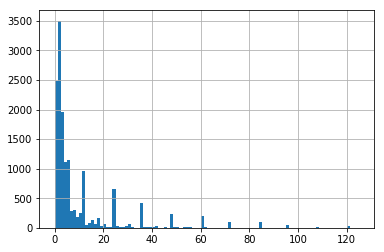

In [20]:
# Age - distribution check

train['Age'].hist(bins=100, range=(0, 125));

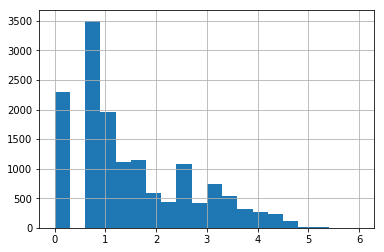

In [21]:
# Age - log transform

train['Age_log'] = train['Age'].replace(0, np.nan, inplace=False)
train['Age_log'] = np.log(train['Age_log'])
train['Age_log'].hist(bins=20, range=(0, 6));

In [22]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Age_log
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1.098612
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.000000
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.000000
3,1,Miko,4,307,0,2,1,2,0,2,...,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,1.386294
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.000000


In [23]:
# Type - check cat vs. dog

train['Type'].value_counts()

1    8132
2    6861
Name: Type, dtype: int64

In [24]:
# Type - create dummies for cats and dogs

cat_dog = pd.get_dummies(train['Type'])
cat_dog.head()

,1,2
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [25]:
# Type - merge dummies into dataset

train = pd.concat([train, cat_dog], axis=1)
train.rename(columns={1: 'Dog'}, inplace=True)
train.rename(columns={2: 'Cat'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Age_log,Dog,Cat
0,2,Nibble,3,299,0,1,1,7,0,1,...,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1.098612,0,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.000000,0,1
2,1,Brisco,1,307,0,1,2,7,0,2,...,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.000000,1,0
3,1,Miko,4,307,0,2,1,2,0,2,...,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,1.386294,1,0
4,1,Hunter,1,307,0,1,1,0,0,2,...,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.000000,1,0


In [26]:
# Gender assessment for mixed (3) if group of pets

train['Gender'].value_counts()

2    7277
1    5536
3    2180
Name: Gender, dtype: int64

In [27]:
# Creating gender dummies

gender = pd.get_dummies(train['Gender'])
gender.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [28]:
# Merging gender dummies into dataset

train = pd.concat([train, gender], axis=1)
train.rename(columns={1: 'Male'}, inplace=True)
train.rename(columns={2: 'Female'}, inplace=True)
train.rename(columns={3: 'Mixed Gender (Group)'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Description,PetID,PhotoAmt,AdoptionSpeed,Age_log,Dog,Cat,Male,Female,Mixed Gender (Group)
0,2,Nibble,3,299,0,1,1,7,0,1,...,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1.098612,0,1,1,0,0
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.000000,0,1,1,0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.000000,1,0,1,0,0
3,1,Miko,4,307,0,2,1,2,0,2,...,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,1.386294,1,0,0,1,0
4,1,Hunter,1,307,0,1,1,0,0,2,...,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.000000,1,0,1,0,0


In [29]:
# Maturity cleanup

# MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)

train['MaturitySize'] = train['MaturitySize'].replace(0, np.nan, inplace=False)
train['MaturitySize'].value_counts()

2    10305
1     3395
3     1260
4       33
Name: MaturitySize, dtype: int64

In [30]:
# Fur length cleanup

# FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)

train['FurLength'] = train['FurLength'].replace(0, np.nan, inplace=False)
train['FurLength'].value_counts()

1    8808
2    5361
3     824
Name: FurLength, dtype: int64

In [31]:
# Creating vaccinated dummies for yes/no data (answer 3 was "not sure")

train['Vaccinated'] = train['Vaccinated'].replace(3, np.nan, inplace=False)
vaccinated_dummies = pd.get_dummies(train['Vaccinated'])
vaccinated_dummies.head()

,1.0,2.0
0,0,1
1,0,0
2,1,0
3,1,0
4,0,1


In [32]:
# Merging vaccinated dummies into dataset

train = pd.concat([train, vaccinated_dummies], axis=1)
train.rename(columns={1: 'Vaccinated_D'}, inplace=True)
train.rename(columns={2: 'Not vaccinated'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,PhotoAmt,AdoptionSpeed,Age_log,Dog,Cat,Male,Female,Mixed Gender (Group),Vaccinated_D,Not vaccinated
0,2,Nibble,3,299,0,1,1,7,0,1,...,1.0,2,1.098612,0,1,1,0,0,0,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,2.0,0,0.000000,0,1,1,0,0,0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,7.0,3,0.000000,1,0,1,0,0,1,0
3,1,Miko,4,307,0,2,1,2,0,2,...,8.0,2,1.386294,1,0,0,1,0,1,0
4,1,Hunter,1,307,0,1,1,0,0,2,...,3.0,2,0.000000,1,0,1,0,0,0,1


In [33]:
# Creating dewormed dummies for yes/no data (answer 3 was "not sure")

train['Dewormed'] = train['Dewormed'].replace(3, np.nan, inplace=False)
dewormed_dummies = pd.get_dummies(train['Dewormed'])
dewormed_dummies.head()

,1.0,2.0
0,0,1
1,0,0
2,1,0
3,1,0
4,0,1


In [34]:
# Merging dewormed dummies into dataset

train = pd.concat([train, dewormed_dummies], axis=1)
train.rename(columns={1: 'Dewormed_D'}, inplace=True)
train.rename(columns={2: 'Not dewormed'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Age_log,Dog,Cat,Male,Female,Mixed Gender (Group),Vaccinated_D,Not vaccinated,Dewormed_D,Not dewormed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1.098612,0,1,1,0,0,0,1,0,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0.000000,0,1,1,0,0,0,0,0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,0.000000,1,0,1,0,0,1,0,1,0
3,1,Miko,4,307,0,2,1,2,0,2,...,1.386294,1,0,0,1,0,1,0,1,0
4,1,Hunter,1,307,0,1,1,0,0,2,...,0.000000,1,0,1,0,0,0,1,0,1


In [35]:
# Creating sterilized dummies for yes/no data (answer 3 was "not sure")

train['Sterilized'] = train['Sterilized'].replace(3, np.nan, inplace=False)
sterilized_dummies = pd.get_dummies(train['Sterilized'])
sterilized_dummies.head()

,1.0,2.0
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [36]:
# Merging sterilized dummies into dataset

train = pd.concat([train, sterilized_dummies], axis=1)
train.rename(columns={1: 'Sterilized_D'}, inplace=True)
train.rename(columns={2: 'Not sterilized'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Cat,Male,Female,Mixed Gender (Group),Vaccinated_D,Not vaccinated,Dewormed_D,Not dewormed,Sterilized_D,Not sterilized
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,0,0,0,1,0,1,0,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,0,0,0,0,0,0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,0,1,0,0,1,0,1,0,0,1
3,1,Miko,4,307,0,2,1,2,0,2,...,0,0,1,0,1,0,1,0,0,1
4,1,Hunter,1,307,0,1,1,0,0,2,...,0,1,0,0,0,1,0,1,0,1


In [37]:
# Create health dummies (instead of cleanup)

# Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

train['Health'] = train['Health'].replace(0, np.nan, inplace=False)
health_dummies = pd.get_dummies(train['Health'])
health_dummies.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [38]:
# Merging health dummies into dataset

train = pd.concat([train, health_dummies], axis=1)
train.rename(columns={1: 'Healthy'}, inplace=True)
train.rename(columns={2: 'Minor Injury'}, inplace=True)
train.rename(columns={3: 'Serious Injury'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Mixed Gender (Group),Vaccinated_D,Not vaccinated,Dewormed_D,Not dewormed,Sterilized_D,Not sterilized,Healthy,Minor Injury,Serious Injury
0,2,Nibble,3,299,0,1,1,7,0,1,...,0,0,1,0,1,0,1,1,0,0
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0,0,0,0,0,0,0,1,0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,0,1,0,1,0,0,1,1,0,0
3,1,Miko,4,307,0,2,1,2,0,2,...,0,1,0,1,0,0,1,1,0,0
4,1,Hunter,1,307,0,1,1,0,0,2,...,0,0,1,0,1,0,1,1,0,0


In [39]:
# Quantity distribution check

train['Quantity'].value_counts()

1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
20       12
11       10
12        6
15        4
17        3
16        3
13        2
14        2
18        1
Name: Quantity, dtype: int64

In [40]:
# Creating "single" variables

train['Single_pic'] = np.where(train['Quantity']==1, 1, 0)
train['Single_pic'].value_counts()

1    11565
0     3428
Name: Single_pic, dtype: int64

In [41]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Vaccinated_D,Not vaccinated,Dewormed_D,Not dewormed,Sterilized_D,Not sterilized,Healthy,Minor Injury,Serious Injury,Single_pic
0,2,Nibble,3,299,0,1,1,7,0,1,...,0,1,0,1,0,1,1,0,0,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0,0,0,0,0,0,1,0,0,1
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,0,1,0,0,1,1,0,0,1
3,1,Miko,4,307,0,2,1,2,0,2,...,1,0,1,0,0,1,1,0,0,1
4,1,Hunter,1,307,0,1,1,0,0,2,...,0,1,0,1,0,1,1,0,0,1


In [42]:
# Creating "group" variable

train['Group_pic'] = np.where(train['Quantity']>1, 1, 0)
train['Group_pic'].value_counts()

0    11565
1     3428
Name: Group_pic, dtype: int64

In [43]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Not vaccinated,Dewormed_D,Not dewormed,Sterilized_D,Not sterilized,Healthy,Minor Injury,Serious Injury,Single_pic,Group_pic
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,0,1,0,1,1,0,0,1,0
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0,0,0,0,0,1,0,0,1,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,0,1,0,0,1,1,0,0,1,0
3,1,Miko,4,307,0,2,1,2,0,2,...,0,1,0,0,1,1,0,0,1,0
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,0,1,0,1,1,0,0,1,0


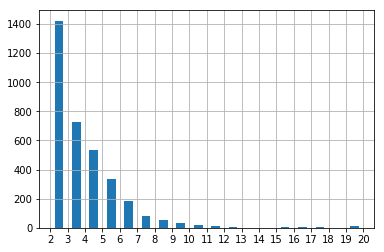

In [44]:
# Creating group quantity variable (tried log transforming this one without big effect, so skipped)

train['Group_size'] = train['Quantity'].replace(1, np.nan, inplace=False)
train['Group_size'].hist(bins=18, rwidth=0.5)
plt.xticks(np.arange(2, 21, step=1));

In [45]:
train.tail()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Dewormed_D,Not dewormed,Sterilized_D,Not sterilized,Healthy,Minor Injury,Serious Injury,Single_pic,Group_pic,Group_size
14988,2,NaN,2,266,0,3,1,0,0,2,...,0,1,0,1,1,0,0,0,1,4.0
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,1,0,1,0,1,0,0,0,1,2.0
14990,2,Monkies,2,265,266,3,5,6,7,3,...,1,0,0,0,1,0,0,0,1,5.0
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,0,1,0,1,0,0,1,0,NaN
14992,1,Fili,1,307,307,1,2,0,0,2,...,0,1,0,1,1,0,0,1,0,NaN


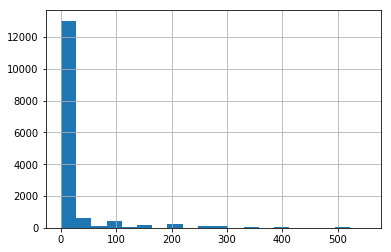

In [46]:
# Fee distribution check

# Fee - Adoption fee (0 = Free)

train['Fee'].hist(bins=20, range=(0, 550));

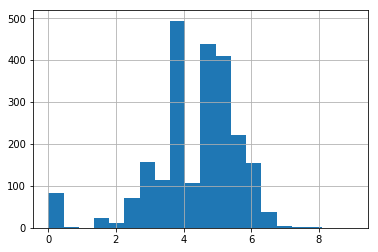

In [47]:
# This excludes zero!!

train['Fee_log'] = train['Fee'].replace(0, np.nan, inplace=False)
train['Fee_log'] = np.log(train['Fee_log'])
train['Fee_log'].hist(bins=20, range=(0, 9));

In [48]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Not dewormed,Sterilized_D,Not sterilized,Healthy,Minor Injury,Serious Injury,Single_pic,Group_pic,Group_size,Fee_log
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,0,1,1,0,0,1,0,NaN,4.605170
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0,0,0,1,0,0,1,0,NaN,NaN
2,1,Brisco,1,307,0,1,2,7,0,2,...,0,0,1,1,0,0,1,0,NaN,NaN
3,1,Miko,4,307,0,2,1,2,0,2,...,0,0,1,1,0,0,1,0,NaN,5.010635
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,0,1,1,0,0,1,0,NaN,NaN


#### Colors dummy code



In [49]:
# Dominant color dummies creation

color_dummies = pd.get_dummies(train['Color1'])
color_dummies.head()

,1,2,3,4,5,6,7
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [50]:
# Color label check

color_labels.head(7)

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


In [51]:
# Dominant color column name cleanup

train = pd.concat([train, color_dummies], axis=1)
train.rename(columns={1: 'Black'}, inplace=True)
train.rename(columns={2: 'Brown'}, inplace=True)
train.rename(columns={3: 'Golden'}, inplace=True)
train.rename(columns={4: 'Yellow'}, inplace=True)
train.rename(columns={5: 'Cream'}, inplace=True)
train.rename(columns={6: 'Gray'}, inplace=True)
train.rename(columns={7: 'White'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Group_pic,Group_size,Fee_log,Black,Brown,Golden,Yellow,Cream,Gray,White
0,2,Nibble,3,299,0,1,1,7,0,1,...,0,NaN,4.605170,1,0,0,0,0,0,0
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0,NaN,NaN,1,0,0,0,0,0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,0,NaN,NaN,0,1,0,0,0,0,0
3,1,Miko,4,307,0,2,1,2,0,2,...,0,NaN,5.010635,1,0,0,0,0,0,0
4,1,Hunter,1,307,0,1,1,0,0,2,...,0,NaN,NaN,1,0,0,0,0,0,0


In [52]:
# Color counter variable

# Replacing zeros with nan

train['Color2'] = train['Color2'].replace(0, np.nan, inplace=False)
train['Color3'] = train['Color3'].replace(0, np.nan, inplace=False)

train['Color_number'] = train[['Color1', 'Color2', 'Color3']].count(axis='columns')
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Group_size,Fee_log,Black,Brown,Golden,Yellow,Cream,Gray,White,Color_number
0,2,Nibble,3,299,0,1,1,7.0,NaN,1,...,NaN,4.605170,1,0,0,0,0,0,0,2
1,2,No Name Yet,1,265,0,1,1,2.0,NaN,2,...,NaN,NaN,1,0,0,0,0,0,0,2
2,1,Brisco,1,307,0,1,2,7.0,NaN,2,...,NaN,NaN,0,1,0,0,0,0,0,2
3,1,Miko,4,307,0,2,1,2.0,NaN,2,...,NaN,5.010635,1,0,0,0,0,0,0,2
4,1,Hunter,1,307,0,1,1,NaN,NaN,2,...,NaN,NaN,1,0,0,0,0,0,0,1


In [53]:
train['Color_number'].value_counts()

2    6133
1    4471
3    4389
Name: Color_number, dtype: int64

#### States dummy code

In [54]:
# States dummies creation

state_dummies = pd.get_dummies(train['State'])
state_dummies.head()

,41324,41325,41326,41327,41330,41332,41335,41336,41342,41345,41361,41367,41401,41415
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# States label check

state_labels.head(15)

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


In [56]:
# States column name cleanup

train = pd.concat([train, state_dummies], axis=1)
train.rename(columns={41336: 'Johor'}, inplace=True)
train.rename(columns={41325: 'Kedah'}, inplace=True)
train.rename(columns={41367: 'Kelantan'}, inplace=True)
train.rename(columns={41401: 'Kuala Lumpur'}, inplace=True)
train.rename(columns={41415: 'Labuan'}, inplace=True)
train.rename(columns={41324: 'Melaka'}, inplace=True)
train.rename(columns={41332: 'Negeri Sembilan'}, inplace=True)
train.rename(columns={41335: 'Pahang'}, inplace=True)
train.rename(columns={41330: 'Perak'}, inplace=True)
train.rename(columns={41380: 'Perlis'}, inplace=True)
train.rename(columns={41327: 'Pulau Pinang'}, inplace=True)
train.rename(columns={41345: 'Sabah'}, inplace=True)
train.rename(columns={41342: 'Sarawak'}, inplace=True)
train.rename(columns={41326: 'Selangor'}, inplace=True)
train.rename(columns={41361: 'Terengganu'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Perak,Negeri Sembilan,Pahang,Johor,Sarawak,Sabah,Terengganu,Kelantan,Kuala Lumpur,Labuan
0,2,Nibble,3,299,0,1,1,7.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
1,2,No Name Yet,1,265,0,1,1,2.0,NaN,2,...,0,0,0,0,0,0,0,0,1,0
2,1,Brisco,1,307,0,1,2,7.0,NaN,2,...,0,0,0,0,0,0,0,0,0,0
3,1,Miko,4,307,0,2,1,2.0,NaN,2,...,0,0,0,0,0,0,0,0,1,0
4,1,Hunter,1,307,0,1,1,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,0


#### Breeds dummy code

In [57]:
# Breeds 80/20 tail-end cutoff detection

train['Breedcount'] = train.groupby('Breed1')['Breed1'].transform('count')
train['Breedcount'].quantile(0.2)

205.0

In [58]:
train['Breeds'] = train['Breedcount']
train['Breeds'] = train['Breeds'].where(train['Breeds'].between(205,10000), 0, inplace=False)
train['Breeds'].value_counts()

5927    5927
3634    3634
0       2846
1258    1258
342      342
296      296
264      264
221      221
205      205
Name: Breeds, dtype: int64

In [59]:
train['Breed1'].loc[train['Breeds'] == 5927].value_counts()

307    5927
Name: Breed1, dtype: int64

In [60]:
breed_labels.loc[breed_labels['BreedID'] == 307]

,BreedID,Type,BreedName
240,307,1,Mixed Breed


In [61]:
train['Breed1'].loc[train['Breeds'] == 3634].value_counts()

266    3634
Name: Breed1, dtype: int64

In [62]:
breed_labels.loc[breed_labels['BreedID'] == 266]

,BreedID,Type,BreedName
266,266,2,Domestic Short Hair


In [63]:
train['Breed1'].loc[train['Breeds'] == 1258].value_counts()

265    1258
Name: Breed1, dtype: int64

In [64]:
breed_labels.loc[breed_labels['BreedID'] == 265]

,BreedID,Type,BreedName
265,265,2,Domestic Medium Hair


In [65]:
train['Breed1'].loc[train['Breeds'] == 342].value_counts()

299    342
Name: Breed1, dtype: int64

In [66]:
breed_labels.loc[breed_labels['BreedID'] == 299]

,BreedID,Type,BreedName
299,299,2,Tabby


In [67]:
train['Breed1'].loc[train['Breeds'] == 296].value_counts()

264    296
Name: Breed1, dtype: int64

In [68]:
breed_labels.loc[breed_labels['BreedID'] == 264]

,BreedID,Type,BreedName
264,264,2,Domestic Long Hair


In [69]:
train['Breed1'].loc[train['Breeds'] == 264].value_counts()

292    264
Name: Breed1, dtype: int64

In [70]:
breed_labels.loc[breed_labels['BreedID'] == 292]

,BreedID,Type,BreedName
292,292,2,Siamese


In [71]:
train['Breed1'].loc[train['Breeds'] == 221].value_counts()

285    221
Name: Breed1, dtype: int64

In [72]:
breed_labels.loc[breed_labels['BreedID'] == 285]

,BreedID,Type,BreedName
285,285,2,Persian


In [73]:
train['Breed1'].loc[train['Breeds'] == 205].value_counts()

141    205
Name: Breed1, dtype: int64

In [74]:
breed_labels.loc[breed_labels['BreedID'] == 141]

,BreedID,Type,BreedName
140,141,1,Labrador Retriever


In [75]:
breed_labels.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [76]:
# Breeds dummy code

breeds_dummies = pd.get_dummies(train['Breeds'])
breeds_dummies.head()

,0,205,221,264,296,342,1258,3634,5927
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


In [77]:
# Merging breeds into train data

train = pd.concat([train, breeds_dummies], axis=1)
train.rename(columns={0: 'Breed Not Classified'}, inplace=True)
train.rename(columns={205: 'Labrador Retriever'}, inplace=True)
train.rename(columns={221: 'Persian'}, inplace=True)
train.rename(columns={264: 'Siamese'}, inplace=True)
train.rename(columns={296: 'Domestic Long Hair'}, inplace=True)
train.rename(columns={342: 'Tabby'}, inplace=True)
train.rename(columns={1258: 'Domestic Medium Hair'}, inplace=True)
train.rename(columns={3634: 'Domestic Short Hair'}, inplace=True)
train.rename(columns={5927: 'Mixed Breed'}, inplace=True)

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Breeds,Breed Not Classified,Labrador Retriever,Persian,Siamese,Domestic Long Hair,Tabby,Domestic Medium Hair,Domestic Short Hair,Mixed Breed
0,2,Nibble,3,299,0,1,1,7.0,NaN,1,...,342,0,0,0,0,0,1,0,0,0
1,2,No Name Yet,1,265,0,1,1,2.0,NaN,2,...,1258,0,0,0,0,0,0,1,0,0
2,1,Brisco,1,307,0,1,2,7.0,NaN,2,...,5927,0,0,0,0,0,0,0,0,1
3,1,Miko,4,307,0,2,1,2.0,NaN,2,...,5927,0,0,0,0,0,0,0,0,1
4,1,Hunter,1,307,0,1,1,NaN,NaN,2,...,5927,0,0,0,0,0,0,0,0,1


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 76 columns):
Type                    14993 non-null int64
Name                    13736 non-null object
Age                     14993 non-null int64
Breed1                  14993 non-null int64
Breed2                  14993 non-null int64
Gender                  14993 non-null int64
Color1                  14993 non-null int64
Color2                  10522 non-null float64
Color3                  4389 non-null float64
MaturitySize            14993 non-null int64
FurLength               14993 non-null int64
Vaccinated              13125 non-null float64
Dewormed                13212 non-null float64
Sterilized              13178 non-null float64
Health                  14993 non-null int64
Quantity                14993 non-null int64
Fee                     14993 non-null int64
State                   14993 non-null int64
RescuerID               14993 non-null object
VideoAmt                1

### Sentiment data

Things to try with the json annotation:
- Document sentiment magnitude and score: create pandas dataframe which includes this information
- Merge the analysis results to respective petID

In [79]:
# https://stackoverflow.com/questions/10377998/how-can-i-iterate-over-files-in-a-given-directory

import json

sentiment_data = pd.DataFrame(columns=['PetID', 'Docsenti_magnitude', 'Docsenti_score'])

directory = 'train_sentiment/'

for filename in os.listdir(directory):
    f = open(directory+filename, 'r', encoding='utf-8')        
    PetID = filename[:-5]
    content = json.load(f)
    magnitude = content['documentSentiment']['magnitude']
    score = content['documentSentiment']['score']
    sentiment_data = sentiment_data.append(pd.Series([PetID, magnitude, score], index=sentiment_data.columns), 
                                           ignore_index=True)
    #print (PetID, magnitude, score)

sentiment_data.head()

,PetID,Docsenti_magnitude,Docsenti_score
0,256f40704,3.8,0.2
1,95bc62678,2.4,0.3
2,6945dbebb,0.1,0.1
3,2e3c8edaf,0.5,0.2
4,e470b6bd3,0.4,0.4


### Images
Data might be relevant to be combined into dataframe later on. Therefore, images need to be converted into numbers.

Use first two links to bring in image data for classification. We want to find out added value by images for classifying adoption speed. So use this, create a column for predicted adoption speed, and let that column influence the overall classifyer.

Challenge will be a good network architecture, by playing around a bit or applying transfer learning. 

- https://www.kaggle.com/gaborvecsei/adoption-speed-from-images
- https://www.tensorflow.org/guide/keras

Other links that might be useful:
- https://www.tensorflow.org/guide/datasets
- https://towardsdatascience.com/how-to-use-dataset-in-tensorflow-c758ef9e4428

#### Creating and pre-processing the datasets

In [80]:
# Loading libraries and bringing the images into format 224 * 224

import keras
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

Using TensorFlow backend.


In [81]:
# Creating train target variable
# Source: https://www.kaggle.com/gaborvecsei/adoption-speed-from-images

from pathlib import Path
import cv2

image_paths_train = list(Path("train_images/").glob("*.jpg"))
image_ids_train = [x.stem.split("-")[0] for x in image_paths_train]
train_img = train.merge(pd.DataFrame({"PetID":image_ids_train, "ImagePath":image_paths_train}), on="PetID", how="outer")
has_images_mask_train = ~train_img["ImagePath"].isnull()

print("Number of entries without images: {0}".format((~has_images_mask_train).sum()))

train_img = train_img.dropna(subset=["ImagePath"])

Number of entries without images: 341


In [82]:
train_img.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Breed Not Classified,Labrador Retriever,Persian,Siamese,Domestic Long Hair,Tabby,Domestic Medium Hair,Domestic Short Hair,Mixed Breed,ImagePath
0,2,Nibble,3,299,0,1,1,7.0,NaN,1,...,0,0,0,0,0,1,0,0,0,train_images/86e1089a3-1.jpg
1,2,No Name Yet,1,265,0,1,1,2.0,NaN,2,...,0,0,0,0,0,0,1,0,0,train_images/6296e909a-2.jpg
2,2,No Name Yet,1,265,0,1,1,2.0,NaN,2,...,0,0,0,0,0,0,1,0,0,train_images/6296e909a-1.jpg
3,1,Brisco,1,307,0,1,2,7.0,NaN,2,...,0,0,0,0,0,0,0,0,1,train_images/3422e4906-6.jpg
4,1,Brisco,1,307,0,1,2,7.0,NaN,2,...,0,0,0,0,0,0,0,0,1,train_images/3422e4906-5.jpg


In [83]:
train_img = train_img.dropna(subset=["ImagePath"])
train_img.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Breed Not Classified,Labrador Retriever,Persian,Siamese,Domestic Long Hair,Tabby,Domestic Medium Hair,Domestic Short Hair,Mixed Breed,ImagePath
0,2,Nibble,3,299,0,1,1,7.0,NaN,1,...,0,0,0,0,0,1,0,0,0,train_images/86e1089a3-1.jpg
1,2,No Name Yet,1,265,0,1,1,2.0,NaN,2,...,0,0,0,0,0,0,1,0,0,train_images/6296e909a-2.jpg
2,2,No Name Yet,1,265,0,1,1,2.0,NaN,2,...,0,0,0,0,0,0,1,0,0,train_images/6296e909a-1.jpg
3,1,Brisco,1,307,0,1,2,7.0,NaN,2,...,0,0,0,0,0,0,0,0,1,train_images/3422e4906-6.jpg
4,1,Brisco,1,307,0,1,2,7.0,NaN,2,...,0,0,0,0,0,0,0,0,1,train_images/3422e4906-5.jpg


In [84]:
# Creating test dataset
# Source: https://www.kaggle.com/gaborvecsei/adoption-speed-from-images

image_paths_test = list(Path("test_images/").glob("*.jpg"))
image_ids_test = [x.stem.split("-")[0] for x in image_paths_test]
test_img = test.merge(pd.DataFrame({"PetID":image_ids_test, "ImagePath":image_paths_test}), on="PetID", how="outer")
has_images_mask_test = ~test_img["ImagePath"].isnull()

print("Number of entries without test images: {0}".format((~has_images_mask_test).sum()))

test_img = test_img.dropna(subset=["ImagePath"])

Number of entries without test images: 127


In [85]:
test_img.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,ImagePath
0,1,Puppy,2,307,0,1,1,0,0,2,...,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,"Puppy is calm for a young dog, but he becomes ...",378fcc4fc,3.0,test_images/378fcc4fc-2.jpg
1,1,Puppy,2,307,0,1,1,0,0,2,...,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,"Puppy is calm for a young dog, but he becomes ...",378fcc4fc,3.0,test_images/378fcc4fc-3.jpg
2,1,Puppy,2,307,0,1,1,0,0,2,...,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,"Puppy is calm for a young dog, but he becomes ...",378fcc4fc,3.0,test_images/378fcc4fc-1.jpg
3,2,London,24,266,0,1,2,7,0,2,...,1,1,0,41326,4475f31553f0170229455e3c5645644f,0,Urgently seeking adoption. Please contact for ...,73c10e136,1.0,test_images/73c10e136-1.jpg
4,2,Snowball,20,266,0,2,7,0,0,2,...,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,Snowball... doesn't look so good (she is healt...,72000c4c5,1.0,test_images/72000c4c5-1.jpg


In [86]:
test_img = test_img.dropna(subset=["ImagePath"])
test_img.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,ImagePath
0,1,Puppy,2,307,0,1,1,0,0,2,...,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,"Puppy is calm for a young dog, but he becomes ...",378fcc4fc,3.0,test_images/378fcc4fc-2.jpg
1,1,Puppy,2,307,0,1,1,0,0,2,...,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,"Puppy is calm for a young dog, but he becomes ...",378fcc4fc,3.0,test_images/378fcc4fc-3.jpg
2,1,Puppy,2,307,0,1,1,0,0,2,...,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,"Puppy is calm for a young dog, but he becomes ...",378fcc4fc,3.0,test_images/378fcc4fc-1.jpg
3,2,London,24,266,0,1,2,7,0,2,...,1,1,0,41326,4475f31553f0170229455e3c5645644f,0,Urgently seeking adoption. Please contact for ...,73c10e136,1.0,test_images/73c10e136-1.jpg
4,2,Snowball,20,266,0,2,7,0,0,2,...,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,Snowball... doesn't look so good (she is healt...,72000c4c5,1.0,test_images/72000c4c5-1.jpg


In [87]:
# Reducing sample size for train dataset

train_sample = 15000

train_img = train_img[0:train_sample]

In [88]:
# Define function to load train, test, and validation datasets

from sklearn.datasets import load_files
from keras.utils import np_utils
from glob import glob

def load_dataset(path):
    data = load_files(path)
    files = np.array(train_img["ImagePath"])
    targets = np_utils.to_categorical(np.array(train_img["AdoptionSpeed"]), 5)
    return files, targets

# load train and target data
train_valid_files, train_valid_targets = load_dataset('train_images/')

In [89]:
# Loading the image file data, AWS can load up to 15,000 images
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Pre-process the data for Keras incl. scaling down by 255
train_tensors = paths_to_tensor(train_valid_files).astype('float32')/255
print('Tensors loaded!')

100%|██████████| 15000/15000 [01:00<00:00, 243.57it/s]


Tensors loaded!


#### Creating keras CNN from scratch along Udacity dog breed detection project 

In [93]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

num_classes = len(train_valid_targets[0])

model = Sequential()

# I start with a convolutional 2d layer. The image shape used is 224x224 pixel, 
# I've selected filters=16 to set the weights for the convolutional window. The kernel size of 2 basically means 
# that the model looks at 2 pixels at a time. The weights/filters will be input for the dense function 
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(224, 224, 3)))

# Max pooling 2D helps to reduce model complexity/dimensionality when we need a large number of filters, 
# e.g. for image recognition. It takes the convolutional layer as input. Pool_size defines the size of the 
# pooling window, means it will pool two pixels into one pixel. It will only look at distinct sets of 
# 2x2 pixels, not overlapping sets. Max pooling means that it will output the max number within the 2x2 pixels 
# it is looking at.
model.add(MaxPooling2D(pool_size=2))

# Another Conv2D layer is used, this time the filter is doubled compared to the first layer as we have less 
# complex input because of the max pooling reduction, so with simpler images we need to have a closer look.
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))

# Max pooling 2D helps again reducing the model dimensionality
model.add(MaxPooling2D(pool_size=2))

# Another Conv2D layer is used, the filter is again doubled compared to the first layer as we have less 
# complex input because of the max pooling reduction, so with simpler images we need to have a closer look.
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))

# Max pooling 2D helps again reducing the model dimensionality
model.add(MaxPooling2D(pool_size=2))

# Now the global average pooling layer. Compared to max pooling, which delivered the max number within it's 2 by 2
# pixel matrix, the global average will deliver the average of that one.
model.add(GlobalAveragePooling2D())

# Last layer is a dense layer with softmax activation. A dense layer translates input into the given set of output 
# targets, in our case 5 adoption speeds. The softmax activation function helps us to work with probabilities of 
# adoption speed, i.e. a picture could be speed 1 with a probablity of YX, speed 2 with a probability of XY etc.
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
__________

In [94]:
# Compiling the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [140]:
# Training the model

from keras.callbacks import ModelCheckpoint  

# os.mkdir('Saved_models')

epochs = 3

checkpointer = ModelCheckpoint(filepath='Saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_valid_targets, 
          validation_split=0.2, shuffle=True,
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 12000 samples, validate on 3000 samples
Epoch 1/3
12000/12000 [==============================] - 296s 25ms/step - loss: 1.4512 - acc: 0.2884 - val_loss: 1.4375 - val_acc: 0.3013

Epoch 00001: val_loss improved from inf to 1.43747, saving model to Saved_models/weights.best.from_scratch.hdf5
Epoch 2/3
12000/12000 [==============================] - 295s 25ms/step - loss: 1.4486 - acc: 0.3008 - val_loss: 1.4375 - val_acc: 0.3017

Epoch 00002: val_loss did not improve from 1.43747
Epoch 3/3
12000/12000 [==============================] - 295s 25ms/step - loss: 1.4473 - acc: 0.2998 - val_loss: 1.4379 - val_acc: 0.3063

Epoch 00003: val_loss did not improve from 1.43747


*Best weights are saved in case needed later*

#### Creating keras CNN with transfer learning

##### VGG19

In [99]:
from keras.applications.vgg19 import VGG19 #Download 500+ MB)
from keras import layers
from keras import models
from keras.callbacks import ModelCheckpoint

num_classes = len(train_valid_targets[0])

base_VGG19_model = VGG19(include_top=False, weights=None, input_shape=(224, 224, 3), pooling='avg')

VGG19_out = base_VGG19_model.output

VGG19_out = layers.Dense(num_classes, activation='softmax')(VGG19_out)

VGG19_model = models.Model(inputs = base_VGG19_model.input, outputs = VGG19_out)

VGG19_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [100]:
# Compile the model

VGG19_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
# Training the model - takes about 3 hours for one episode on local machine for limited sample number

epochs = 3

checkpointer = ModelCheckpoint(filepath='Saved_models/weights.best.VGG19.hdf5', 
                               verbose=1, save_best_only=True)

VGG19_model.fit(train_tensors, train_valid_targets, 
          validation_split=0.2, shuffle=True,
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 12000 samples, validate on 3000 samples
Epoch 1/3
  180/12000 [..............................] - ETA: 5:52:59 - loss: 9.7601 - acc: 0.3111

KeyboardInterrupt: 

*Best weights are saved in case needed later*

##### Resnet50

In [102]:
from keras.applications.resnet50 import ResNet50 #Download 90+ MB)
from keras import layers
from keras import models
from keras.callbacks import ModelCheckpoint

num_classes = len(train_valid_targets[0])

base_Resnet50_model = ResNet50(include_top=False, weights=None, input_shape=(224, 224, 3), pooling='avg')

Resnet50_out = base_Resnet50_model.output

Resnet50_out = layers.Dense(num_classes, activation='softmax')(Resnet50_out)

Resnet50_model = models.Model(inputs = base_Resnet50_model.input, outputs = Resnet50_out)

Resnet50_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [103]:
# Compile the model

Resnet50_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
# Training the model - takes about 3 hours for one episode on local machine

epochs = 3

checkpointer = ModelCheckpoint(filepath='Saved_models/weights.best.Resnet50.hdf5', 
                               verbose=1, save_best_only=True)

Resnet50_model.fit(train_tensors, train_valid_targets,
          validation_split=0.2, shuffle=True,
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 12000 samples, validate on 3000 samples
Epoch 1/3
  200/12000 [..............................] - ETA: 3:07:24 - loss: 3.0771 - acc: 0.2550

KeyboardInterrupt: 

*Best weights are saved in case needed later*

**The best-performing model on the validation data is the ...**

In [ ]:
# Load best weights

Resnet50_model.load_weights('Saved_models/weights.best.Resnet50.hdf5')

#### Write prediction column in train dataset

In [95]:
# Load best weights

model.load_weights('Saved_models/weights.best.from_scratch.hdf5')

In [96]:
# Making predictions into new dataframe with train_img PetID

pred_adoption_speed = pd.DataFrame(columns=['CNN_Adoption_Prediction'])

for tensor in train_tensors:
    pred = np.argmax(model.predict(np.expand_dims(tensor, axis=0)))    
    pred_adoption_speed = pred_adoption_speed.append(pd.Series([pred], index=pred_adoption_speed.columns), 
                                           ignore_index=True)

pred_img = pd.DataFrame(columns=['PetID', 'CNN_Adoption_Prediction'])
pred_img['PetID'] = train_img['PetID'] 
pred_img['CNN_Adoption_Prediction'] = pred_adoption_speed['CNN_Adoption_Prediction']

pred_img.head()

,PetID,CNN_Adoption_Prediction
0,86e1089a3,2
1,6296e909a,2
2,6296e909a,3
3,3422e4906,2
4,3422e4906,2


In [97]:
pred_img['CNN_Adoption_Prediction'].value_counts()

2    13281
4      866
3      741
1       11
Name: CNN_Adoption_Prediction, dtype: int64

In [98]:
train_img['AdoptionSpeed'].value_counts()

2    4426
3    3852
4    3632
1    2751
0     339
Name: AdoptionSpeed, dtype: int64

### Image metadata

Things to try with the json annotation:
- Park this one for now, could use to confirm e.g. types (cat/dog), but you already have that annotation

## Dataset merger, final dataset and normalization

### Training dataset

In [167]:
# Selecting the relevant columns for the final dataset incl. PetID and all dummies

pet_datafields = train[['PetID',
                        'AdoptionSpeed',
                        'Name',
                        'Age',
                        'Age_log',
                        'MaturitySize',
                        'FurLength',
                        'Fee',
                        'Fee_log',
                        'RescuerID',
                        'PhotoAmt',
                        'VideoAmt',
                        'Description',
                        'Dog',
                        'Cat',
                        'Male',
                        'Female',
                        'Mixed Gender (Group)',
                        'Healthy',
                        'Minor Injury',
                        'Serious Injury',
                        'Vaccinated_D',
                        'Not vaccinated',
                        'Dewormed_D',
                        'Not dewormed',
                        'Sterilized_D',
                        'Not sterilized',
                        'Black',
                        'Brown',
                        'Golden',
                        'Yellow',
                        'Cream',
                        'Gray',
                        'White',
                        'Color_number',
                        'Breed1',
                        'Breed2',
                        'Breed Not Classified',
                        'Labrador Retriever',
                        'Persian',
                        'Siamese',
                        'Domestic Long Hair',
                        'Domestic Medium Hair',
                        'Domestic Short Hair',
                        'Tabby',
                        'Mixed Breed',
                        'Single_pic',
                        'Group_pic',
                        'Group_size',
                        'Melaka',
                        'Kedah',
                        'Selangor',
                        'Pulau Pinang',
                        'Perak',
                        'Negeri Sembilan',
                        'Pahang',
                        'Johor',
                        'Sarawak',
                        'Sabah',
                        'Terengganu',
                        'Kelantan',
                        'Kuala Lumpur']]

pet_datafields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 62 columns):
PetID                   14993 non-null object
AdoptionSpeed           14993 non-null int64
Name                    13736 non-null object
Age                     14993 non-null int64
Age_log                 14814 non-null float64
MaturitySize            14993 non-null int64
FurLength               14993 non-null int64
Fee                     14993 non-null int64
Fee_log                 2330 non-null float64
RescuerID               14993 non-null object
PhotoAmt                14993 non-null float64
VideoAmt                14993 non-null int64
Description             14981 non-null object
Dog                     14993 non-null uint8
Cat                     14993 non-null uint8
Male                    14993 non-null uint8
Female                  14993 non-null uint8
Mixed Gender (Group)    14993 non-null uint8
Healthy                 14993 non-null uint8
Minor Injury            149

In [168]:
# Merging sentiment data into dataset

pet_data_nonimg = pet_datafields.merge(sentiment_data, how='outer', on='PetID')

pet_data_nonimg.head()

,PetID,AdoptionSpeed,Name,Age,Age_log,MaturitySize,FurLength,Fee,Fee_log,RescuerID,...,Negeri Sembilan,Pahang,Johor,Sarawak,Sabah,Terengganu,Kelantan,Kuala Lumpur,Docsenti_magnitude,Docsenti_score
0,86e1089a3,2,Nibble,3,1.098612,1,1,100,4.605170,8480853f516546f6cf33aa88cd76c379,...,0,0,0,0,0,0,0,0,2.4,0.3
1,6296e909a,0,No Name Yet,1,0.000000,2,2,0,NaN,3082c7125d8fb66f7dd4bff4192c8b14,...,0,0,0,0,0,0,0,1,0.7,-0.2
2,3422e4906,3,Brisco,1,0.000000,2,2,0,NaN,fa90fa5b1ee11c86938398b60abc32cb,...,0,0,0,0,0,0,0,0,3.7,0.2
3,5842f1ff5,2,Miko,4,1.386294,2,1,150,5.010635,9238e4f44c71a75282e62f7136c6b240,...,0,0,0,0,0,0,0,1,0.9,0.9
4,850a43f90,2,Hunter,1,0.000000,2,1,0,NaN,95481e953f8aed9ec3d16fc4509537e8,...,0,0,0,0,0,0,0,0,3.7,0.6


In [169]:
# Merging image prediction data into dataset

full_train = pet_data_nonimg.merge(pred_img, how='outer', on='PetID')

full_train.head()

,PetID,AdoptionSpeed,Name,Age,Age_log,MaturitySize,FurLength,Fee,Fee_log,RescuerID,...,Pahang,Johor,Sarawak,Sabah,Terengganu,Kelantan,Kuala Lumpur,Docsenti_magnitude,Docsenti_score,CNN_Adoption_Prediction
0,86e1089a3,2,Nibble,3,1.098612,1,1,100,4.60517,8480853f516546f6cf33aa88cd76c379,...,0,0,0,0,0,0,0,2.4,0.3,2
1,6296e909a,0,No Name Yet,1,0.000000,2,2,0,NaN,3082c7125d8fb66f7dd4bff4192c8b14,...,0,0,0,0,0,0,1,0.7,-0.2,2
2,6296e909a,0,No Name Yet,1,0.000000,2,2,0,NaN,3082c7125d8fb66f7dd4bff4192c8b14,...,0,0,0,0,0,0,1,0.7,-0.2,3
3,3422e4906,3,Brisco,1,0.000000,2,2,0,NaN,fa90fa5b1ee11c86938398b60abc32cb,...,0,0,0,0,0,0,0,3.7,0.2,2
4,3422e4906,3,Brisco,1,0.000000,2,2,0,NaN,fa90fa5b1ee11c86938398b60abc32cb,...,0,0,0,0,0,0,0,3.7,0.2,2


### Test dataset and pre-processing

In [108]:
# Applying all the transformations as in train dataset

test['Age_log'] = test['Age'].replace(0, np.nan, inplace=False)
test['Age_log'] = np.log(test['Age_log'])

In [109]:
cat_dog_test = pd.get_dummies(test['Type'])

In [110]:
test = pd.concat([test, cat_dog_test], axis=1)
test.rename(columns={1: 'Dog'}, inplace=True)
test.rename(columns={2: 'Cat'}, inplace=True)

In [111]:
gender_test = pd.get_dummies(test['Gender'])

In [112]:
test = pd.concat([test, gender_test], axis=1)
test.rename(columns={1: 'Male'}, inplace=True)
test.rename(columns={2: 'Female'}, inplace=True)
test.rename(columns={3: 'Mixed Gender (Group)'}, inplace=True)

In [113]:
test['MaturitySize'] = test['MaturitySize'].replace(0, np.nan, inplace=False)
test['FurLength'] = test['FurLength'].replace(0, np.nan, inplace=False)

In [114]:
test['Vaccinated'] = test['Vaccinated'].replace(3, np.nan, inplace=False)
vaccinated_dummies_test = pd.get_dummies(test['Vaccinated'])

In [115]:
test = pd.concat([test, vaccinated_dummies_test], axis=1)
test.rename(columns={1: 'Vaccinated_D'}, inplace=True)
test.rename(columns={2: 'Not vaccinated'}, inplace=True)

In [116]:
test['Dewormed'] = test['Dewormed'].replace(3, np.nan, inplace=False)
dewormed_dummies_test = pd.get_dummies(test['Dewormed'])

In [117]:
test = pd.concat([test, dewormed_dummies_test], axis=1)
test.rename(columns={1: 'Dewormed_D'}, inplace=True)
test.rename(columns={2: 'Not dewormed'}, inplace=True)

In [118]:
test['Sterilized'] = test['Sterilized'].replace(3, np.nan, inplace=False)
sterilized_dummies_test = pd.get_dummies(test['Sterilized'])

In [119]:
test = pd.concat([test, sterilized_dummies_test], axis=1)
test.rename(columns={1: 'Sterilized_D'}, inplace=True)
test.rename(columns={2: 'Not sterilized'}, inplace=True)

In [120]:
test['Health'] = test['Health'].replace(0, np.nan, inplace=False)
health_dummies_test = pd.get_dummies(train['Health'])

In [121]:
test = pd.concat([test, health_dummies_test], axis=1)
test.rename(columns={1: 'Healthy'}, inplace=True)
test.rename(columns={2: 'Minor Injury'}, inplace=True)
test.rename(columns={3: 'Serious Injury'}, inplace=True)

In [122]:
test['Single_pic'] = np.where(test['Quantity']==1, 1, 0)
test['Group_pic'] = np.where(test['Quantity']>1, 1, 0)
test['Group_size'] = test['Quantity'].replace(1, np.nan, inplace=False)

In [123]:
# This excludes zero!!

test['Fee_log'] = test['Fee'].replace(0, np.nan, inplace=False)
test['Fee_log'] = np.log(test['Fee_log'])

In [124]:
color_dummies_test = pd.get_dummies(test['Color1'])

In [125]:
test = pd.concat([test, color_dummies_test], axis=1)
test.rename(columns={1: 'Black'}, inplace=True)
test.rename(columns={2: 'Brown'}, inplace=True)
test.rename(columns={3: 'Golden'}, inplace=True)
test.rename(columns={4: 'Yellow'}, inplace=True)
test.rename(columns={5: 'Cream'}, inplace=True)
test.rename(columns={6: 'Gray'}, inplace=True)
test.rename(columns={7: 'White'}, inplace=True)

In [126]:
test['Color2'] = test['Color2'].replace(0, np.nan, inplace=False)
test['Color3'] = test['Color3'].replace(0, np.nan, inplace=False)
test['Color_number'] = test[['Color1', 'Color2', 'Color3']].count(axis='columns')

In [127]:
state_dummies_test = pd.get_dummies(test['State'])

In [128]:
test = pd.concat([test, state_dummies_test], axis=1)
test.rename(columns={41336: 'Johor'}, inplace=True)
test.rename(columns={41325: 'Kedah'}, inplace=True)
test.rename(columns={41367: 'Kelantan'}, inplace=True)
test.rename(columns={41401: 'Kuala Lumpur'}, inplace=True)
test.rename(columns={41415: 'Labuan'}, inplace=True)
test.rename(columns={41324: 'Melaka'}, inplace=True)
test.rename(columns={41332: 'Negeri Sembilan'}, inplace=True)
test.rename(columns={41335: 'Pahang'}, inplace=True)
test.rename(columns={41330: 'Perak'}, inplace=True)
test.rename(columns={41380: 'Perlis'}, inplace=True)
test.rename(columns={41327: 'Pulau Pinang'}, inplace=True)
test.rename(columns={41345: 'Sabah'}, inplace=True)
test.rename(columns={41342: 'Sarawak'}, inplace=True)
test.rename(columns={41326: 'Selangor'}, inplace=True)
test.rename(columns={41361: 'Terengganu'}, inplace=True)

In [129]:
test['Breedcount'] = test.groupby('Breed1')['Breed1'].transform('count')
test['Breeds'] = test['Breedcount']
test['Breeds'] = test['Breeds'].where(test['Breeds'].between(205,10000), np.nan, inplace=False)

breeds_dummies_test = pd.get_dummies(test['Breeds'])

In [130]:
test['Breed Not Classified'] = test['Breed1']
test['Breed Not Classified'] = test['Breed Not Classified'].replace(141, 0)
test['Breed Not Classified'] = test['Breed Not Classified'].replace(285, 0)
test['Breed Not Classified'] = test['Breed Not Classified'].replace(292, 0)
test['Breed Not Classified'] = test['Breed Not Classified'].replace(264, 0)
test['Breed Not Classified'] = test['Breed Not Classified'].replace(265, 0)
test['Breed Not Classified'] = test['Breed Not Classified'].replace(266, 0)
test['Breed Not Classified'] = test['Breed Not Classified'].replace(299, 0)
test['Breed Not Classified'] = test['Breed Not Classified'].replace(307, 0)

In [131]:
test['Breed Not Classified'] = np.where(test['Breed Not Classified']>0, 1, 0)

test['Labrador Retriever'] = np.where(test['Breed1']==141, 1, 0)
test['Persian'] = np.where(test['Breed1']==285, 1, 0)
test['Siamese'] = np.where(test['Breed1']==292, 1, 0)
test['Domestic Long Hair'] = np.where(test['Breed1']==264, 1, 0)
test['Tabby'] = np.where(test['Breed1']==299, 1, 0)
test['Domestic Medium Hair'] = np.where(test['Breed1']==265, 1, 0)
test['Domestic Short Hair'] = np.where(test['Breed1']==266, 1, 0)
test['Mixed Breed'] = np.where(test['Breed1']==307, 1, 0)

test.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Breeds,Breed Not Classified,Labrador Retriever,Persian,Siamese,Domestic Long Hair,Tabby,Domestic Medium Hair,Domestic Short Hair,Mixed Breed
0,1.0,Puppy,2.0,307.0,0.0,1.0,1.0,NaN,NaN,2.0,...,1293.0,0,0,0,0,0,0,0,0,1
1,2.0,London,24.0,266.0,0.0,1.0,2.0,7.0,NaN,2.0,...,1108.0,0,0,0,0,0,0,0,1,0
2,2.0,Snowball,20.0,266.0,0.0,2.0,7.0,NaN,NaN,2.0,...,1108.0,0,0,0,0,0,0,0,1,0
3,2.0,Malibu,5.0,266.0,252.0,2.0,1.0,6.0,7.0,2.0,...,1108.0,0,0,0,0,0,0,0,1,0
4,1.0,Lala Girl,6.0,307.0,0.0,2.0,1.0,2.0,7.0,2.0,...,1293.0,0,0,0,0,0,0,0,0,1


##### Compiling test datafields, sentiment, CNN adoption prediction and dataset merger

In [132]:
# Selecting the relevant columns for the final dataset incl. PetID and all dummies

pet_test_datafields = test[['PetID',
                        'Name',
                        'Age',
                        'Age_log',
                        'MaturitySize',
                        'FurLength',
                        'Fee',
                        'Fee_log',
                        'RescuerID',
                        'PhotoAmt',
                        'VideoAmt',
                        'Description',
                        'Dog',
                        'Cat',
                        'Male',
                        'Female',
                        'Mixed Gender (Group)',
                        'Healthy',
                        'Minor Injury',
                        'Serious Injury',
                        'Vaccinated_D',
                        'Not vaccinated',
                        'Dewormed_D',
                        'Not dewormed',
                        'Sterilized_D',
                        'Not sterilized',
                        'Black',
                        'Brown',
                        'Golden',
                        'Yellow',
                        'Cream',
                        'Gray',
                        'White',
                        'Color_number',
                        'Breed1',
                        'Breed2',
                        'Breed Not Classified',
                        'Labrador Retriever',
                        'Persian',
                        'Siamese',
                        'Domestic Long Hair',
                        'Domestic Medium Hair',
                        'Domestic Short Hair',
                        'Tabby',
                        'Mixed Breed',
                        'Single_pic',
                        'Group_pic',
                        'Group_size',
                        'Melaka',
                        'Kedah',
                        'Selangor',
                        'Pulau Pinang',
                        'Perak',
                        'Negeri Sembilan',
                        'Pahang',
                        'Johor',
                        'Sarawak',
                        'Sabah',
                        'Terengganu',
                        'Kelantan',
                        'Kuala Lumpur']]

pet_test_datafields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 61 columns):
PetID                   3948 non-null object
Name                    3645 non-null object
Age                     3948 non-null float64
Age_log                 3906 non-null float64
MaturitySize            3948 non-null float64
FurLength               3948 non-null float64
Fee                     3948 non-null float64
Fee_log                 748 non-null float64
RescuerID               3948 non-null object
PhotoAmt                3948 non-null float64
VideoAmt                3948 non-null float64
Description             3946 non-null object
Dog                     3948 non-null float64
Cat                     3948 non-null float64
Male                    3948 non-null float64
Female                  3948 non-null float64
Mixed Gender (Group)    3948 non-null float64
Healthy                 14993 non-null uint8
Minor Injury            14993 non-null uint8
Serious Injury          

In [136]:
sentiment_test_data = pd.DataFrame(columns=['PetID', 'Docsenti_magnitude', 'Docsenti_score'])

directory = 'test_sentiment/'

for filename in os.listdir(directory):
    f = open(directory+filename, 'r', encoding='utf-8')        
    PetID = filename[:-5]
    content = json.load(f)
    magnitude = content['documentSentiment']['magnitude']
    score = content['documentSentiment']['score']
    sentiment_test_data = sentiment_test_data.append(pd.Series([PetID, magnitude, score], 
                                                               index=sentiment_test_data.columns), 
                                                     ignore_index=True)

In [137]:
# Sampling for testing

test_size = 3000

test_img = test_img[0:test_size]

In [138]:
# Loading test dataset

def load_test_dataset(path):
    data = load_files(path)
    files = np.array(test_img["ImagePath"])
    return files

test_files = load_test_dataset('test_images/')

print('Test Observations: %d' % (len(test_files)))

Test Observations: 1000


In [139]:
# Loading the image file data
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Pre-process the data for Keras incl. scaling down by 255
test_tensors = paths_to_tensor(test_files).astype('float32')/255
print('Tensors loaded!')

100%|██████████| 1000/1000 [00:04<00:00, 228.70it/s]


Tensors loaded!


In [140]:
# Load best weights

model.load_weights('Saved_models/weights.best.from_scratch.hdf5')

In [141]:
# Making predictions into new dataframe with test_img PetID

pred_test_adoption_speed = pd.DataFrame(columns=['CNN_Adoption_Prediction'])

for tensor in test_tensors:
    pred = np.argmax(model.predict(np.expand_dims(tensor, axis=0)))    
    pred_test_adoption_speed = pred_test_adoption_speed.append(pd.Series([pred], index=pred_test_adoption_speed.columns), 
                                           ignore_index=True)
    
pred_test_img = pd.DataFrame(columns=['PetID', 'CNN_Adoption_Prediction'])
pred_test_img['PetID'] = test_img['PetID'] 
pred_test_img['CNN_Adoption_Prediction'] = pred_test_adoption_speed['CNN_Adoption_Prediction']

pred_test_img.head()

,PetID,CNN_Adoption_Prediction
0,378fcc4fc,2
1,378fcc4fc,2
2,378fcc4fc,2
3,73c10e136,2
4,72000c4c5,3


In [142]:
pred_test_img['CNN_Adoption_Prediction'].value_counts()

2    885
3     60
4     50
Name: CNN_Adoption_Prediction, dtype: int64

In [143]:
pet_test_data_nonimg = pet_test_datafields.merge(sentiment_test_data, how='outer', on='PetID')

pet_test_data_nonimg.head()

,PetID,Name,Age,Age_log,MaturitySize,FurLength,Fee,Fee_log,RescuerID,PhotoAmt,...,Negeri Sembilan,Pahang,Johor,Sarawak,Sabah,Terengganu,Kelantan,Kuala Lumpur,Docsenti_magnitude,Docsenti_score
0,378fcc4fc,Puppy,2.0,0.693147,2.0,2.0,150.0,5.010635,4475f31553f0170229455e3c5645644f,3.0,...,0,0,0,0,0,0,0,0,1.5,0.7
1,73c10e136,London,24.0,3.178054,2.0,1.0,0.0,NaN,4475f31553f0170229455e3c5645644f,1.0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,72000c4c5,Snowball,20.0,2.995732,2.0,1.0,150.0,5.010635,4475f31553f0170229455e3c5645644f,1.0,...,0,0,0,0,0,0,0,0,1.5,0.1
3,e147a4b9f,Malibu,5.0,1.609438,2.0,1.0,100.0,4.605170,4475f31553f0170229455e3c5645644f,1.0,...,0,0,0,0,0,0,0,0,2.2,0.3
4,43fbba852,Lala Girl,6.0,1.791759,2.0,1.0,150.0,5.010635,4475f31553f0170229455e3c5645644f,1.0,...,0,0,0,0,0,0,0,0,1.1,0.2


In [144]:
# Merging image prediction data into dataset

full_test = pet_test_data_nonimg.merge(pred_test_img, how='outer', on='PetID')

full_test.head()

,PetID,Name,Age,Age_log,MaturitySize,FurLength,Fee,Fee_log,RescuerID,PhotoAmt,...,Pahang,Johor,Sarawak,Sabah,Terengganu,Kelantan,Kuala Lumpur,Docsenti_magnitude,Docsenti_score,CNN_Adoption_Prediction
0,378fcc4fc,Puppy,2.0,0.693147,2.0,2.0,150.0,5.010635,4475f31553f0170229455e3c5645644f,3.0,...,0,0,0,0,0,0,0,1.5,0.7,2
1,378fcc4fc,Puppy,2.0,0.693147,2.0,2.0,150.0,5.010635,4475f31553f0170229455e3c5645644f,3.0,...,0,0,0,0,0,0,0,1.5,0.7,2
2,378fcc4fc,Puppy,2.0,0.693147,2.0,2.0,150.0,5.010635,4475f31553f0170229455e3c5645644f,3.0,...,0,0,0,0,0,0,0,1.5,0.7,2
3,73c10e136,London,24.0,3.178054,2.0,1.0,0.0,NaN,4475f31553f0170229455e3c5645644f,1.0,...,0,0,0,0,0,0,0,0.0,0.0,2
4,72000c4c5,Snowball,20.0,2.995732,2.0,1.0,150.0,5.010635,4475f31553f0170229455e3c5645644f,1.0,...,0,0,0,0,0,0,0,1.5,0.1,3


In [145]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26239 entries, 0 to 26238
Data columns (total 65 columns):
PetID                      26239 non-null object
AdoptionSpeed              26239 non-null int64
Name                       24252 non-null object
Age                        26239 non-null int64
Age_log                    25925 non-null float64
MaturitySize               26239 non-null int64
FurLength                  26239 non-null int64
Fee                        26239 non-null int64
Fee_log                    4091 non-null float64
RescuerID                  26239 non-null object
PhotoAmt                   26239 non-null float64
VideoAmt                   26239 non-null int64
Description                26221 non-null object
Dog                        26239 non-null uint8
Cat                        26239 non-null uint8
Male                       26239 non-null uint8
Female                     26239 non-null uint8
Mixed Gender (Group)       26239 non-null uint8
Healthy           

In [146]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15695 entries, 0 to 15694
Data columns (total 64 columns):
PetID                      4650 non-null object
Name                       4347 non-null object
Age                        4650 non-null float64
Age_log                    4608 non-null float64
MaturitySize               4650 non-null float64
FurLength                  4650 non-null float64
Fee                        4650 non-null float64
Fee_log                    889 non-null float64
RescuerID                  4650 non-null object
PhotoAmt                   4650 non-null float64
VideoAmt                   4650 non-null float64
Description                4648 non-null object
Dog                        4650 non-null float64
Cat                        4650 non-null float64
Male                       4650 non-null float64
Female                     4650 non-null float64
Mixed Gender (Group)       4650 non-null float64
Healthy                    15695 non-null uint8
Minor Injury   

## Score function

Submissions are scored based on the quadratic weighted kappa, which measures the agreement between two ratings. This 
metric typically varies from 0 (random agreement between raters) to 1 (complete agreement between raters). In the event that there is less agreement between the raters than expected by chance, the metric may go below 0. The quadratic weighted kappa is calculated between the scores which are expected/known and the predicted scores.

Results have 5 possible ratings, 0,1,2,3,4.  The quadratic weighted kappa is calculated as follows. First, an N x N histogram matrix O is constructed, such that Oi,j corresponds to the number of adoption records that have a rating of i (actual) and received a predicted rating j. An N-by-N matrix of weights, w, is calculated based on the difference between actual and predicted rating scores:

See kaggle for formula: https://www.kaggle.com/c/petfinder-adoption-prediction#evaluation

An N-by-N histogram matrix of expected ratings, E, is calculated, assuming that there is no correlation between rating scores.  This is calculated as the outer product between the actual rating's histogram vector of ratings and the predicted rating's histogram vector of ratings, normalized such that E and O have the same sum.

From these three matrices, the quadratic weighted kappa is calculated as: 

See kaggle for formula: https://www.kaggle.com/c/petfinder-adoption-prediction#evaluation


**Score function used for algorithm development**

For internal training, the scikit classification evaluation methods accuracy score, precision, recall and f1 score will be used in addition to the overall scoring function (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html).

In [ ]:
# Importing libraries and creating scores table
# https://scikit-learn.org/stable/modules/model_evaluation.html
# scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

scores = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1', 'Quadratic Kappa'])

## Train validation split

We can create a train test split on the training data before we can expose our model to the test dataset at first place. The train dataset includes a little less than 15,000 rows, the given test dataset about 3,950 rows.

For the first try, the train set will be split into 11,000 training rows and about 4,000 validation rows. The models will be trained on this data before predicting data along the test set. For simplicity, the artificial test set will be referred to as "validation set". Implementation will be along one comprehensive dataframe. 

**This is subject to change based on iterations.**

In [ ]:
# Splitting the dataset into train and validation
# Now full set vs. train_sample
train_size = int(len(full_train['FurLength']) * 0.8)

train_data = full_train[0:train_size]
valid_data = full_train[train_size:train_sample]

print('Observations: %d' % (train_sample))
print('Training Observations: %d' % (len(train_data)))
print('Validation Observations: %d' % (len(valid_data)))

## Develop the classifier model

Following classifier models will be tried for this project: 
- https://scikit-learn.org/stable/modules/sgd.html#classification
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
- https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

### Selecting model input data

In [149]:
# Incl. check to keep only the full minus one dummies per original variable

from sklearn.preprocessing import Imputer

imputer = Imputer()

train_variables = train_data.drop(['PetID', 
                                   'Name', 
                                   'AdoptionSpeed',
                                   'RescuerID', 
                                   'Description', 
                                   'Dog', 
                                   'Male', 
                                   'Healthy', 
                                   'Not vaccinated', 
                                   'Not dewormed', 
                                   'Not sterilized', 
                                   'Black', 
                                   'Breed1', 
                                   'Breed2', 
                                   'Breed Not Classified', 
                                   'Single_pic', 
                                   'Melaka'], 
                                  axis=1)

train_variables = imputer.fit_transform(train_variables)

train_targets = train_data['AdoptionSpeed']

valid_variables = valid_data.drop(['PetID', 
                                   'Name', 
                                   'AdoptionSpeed',
                                   'RescuerID', 
                                   'Description', 
                                   'Dog', 
                                   'Male', 
                                   'Healthy', 
                                   'Not vaccinated', 
                                   'Not dewormed', 
                                   'Not sterilized', 
                                   'Black', 
                                   'Breed1', 
                                   'Breed2', 
                                   'Breed Not Classified', 
                                   'Single_pic', 
                                   'Melaka'], 
                                  axis=1)

valid_variables = imputer.fit_transform(valid_variables)

valid_targets = valid_data['AdoptionSpeed']

### Stochastic Gradient Descent (SGD) classifier

In [150]:
# https://scikit-learn.org/stable/modules/sgd.html#classification

from sklearn.linear_model import SGDClassifier

SGD_model = SGDClassifier(alpha=0.0001, epsilon=0.1, eta0=0.0, fit_intercept=True, 
                          learning_rate='optimal', loss="hinge", penalty="l2", max_iter=5, random_state=25)

SGD_model.fit(train_variables, train_targets)

SGD_preds = SGD_model.predict(valid_variables)

classifier = 'SGD'
accuracy = accuracy_score(valid_targets, SGD_preds)
precision = precision_score(valid_targets, SGD_preds, average='weighted')
recall = recall_score(valid_targets, SGD_preds, average='weighted')
f1 = f1_score(valid_targets, SGD_preds, average='weighted')
qkappa = cohen_kappa_score(valid_targets, SGD_preds, weights='quadratic')

scores = scores.append(pd.Series([classifier, accuracy, precision, recall, f1, qkappa], index=scores.columns), ignore_index=True)

# Accuracy
print('Accuracy: %.2f' % accuracy)

# Precision
print('Precision: %.2f' % precision)

# Recall
print('Recall: %.2f' % recall)

# F1 score
print('F1 score: %.2f' % f1)

# Quadratic kappa
print('Quadratic kappa: %.2f' % qkappa)

Accuracy: 0.37
Precision: 0.37
Recall: 0.37
F1 score: 0.35
Quadratic kappa: 0.27


### k neighbors classifier

In [151]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

kneigh_model = KNeighborsClassifier(n_neighbors=15)

kneigh_model.fit(train_variables, train_targets)

kneigh_preds = kneigh_model.predict(valid_variables)

classifier = 'kNeigh'
accuracy = accuracy_score(valid_targets, kneigh_preds)
precision = precision_score(valid_targets, kneigh_preds, average='weighted')
recall = recall_score(valid_targets, kneigh_preds, average='weighted')
f1 = f1_score(valid_targets, kneigh_preds, average='weighted')
qkappa = cohen_kappa_score(valid_targets, kneigh_preds, weights='quadratic')

scores = scores.append(pd.Series([classifier, accuracy, precision, recall, f1, qkappa], index=scores.columns), ignore_index=True)

# Accuracy
print('Accuracy: %.2f' % accuracy)

# Precision
print('Precision: %.2f' % precision)

# Recall
print('Recall: %.2f' % recall)

# F1 score
print('F1 score: %.2f' % f1)

# Quadratic kappa
print('Quadratic kappa: %.2f' % qkappa)

Accuracy: 0.34
Precision: 0.34
Recall: 0.34
F1 score: 0.34
Quadratic kappa: 0.20


### Multi-layer perceptron (MLP) classifier

In [152]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(hidden_layer_sizes=(100, ), 
                          activation='relu', 
                          solver='adam', 
                          alpha=0.0001, 
                          batch_size='auto', 
                          learning_rate='constant', 
                          learning_rate_init=0.001,
                          random_state=25)

MLP_model.fit(train_variables, train_targets)

MLP_preds = MLP_model.predict(valid_variables)

classifier = 'MLP'
accuracy = accuracy_score(valid_targets, MLP_preds)
precision = precision_score(valid_targets, MLP_preds, average='weighted')
recall = recall_score(valid_targets, MLP_preds, average='weighted')
f1 = f1_score(valid_targets, MLP_preds, average='weighted')
qkappa = cohen_kappa_score(valid_targets, MLP_preds, weights='quadratic')

scores = scores.append(pd.Series([classifier, accuracy, precision, recall, f1, qkappa], index=scores.columns), ignore_index=True)

# Accuracy
print('Accuracy: %.2f' % accuracy)

# Precision
print('Precision: %.2f' % precision)

# Recall
print('Recall: %.2f' % recall)

# F1 score
print('F1 score: %.2f' % f1)

# Quadratic kappa
print('Quadratic kappa: %.2f' % qkappa)

Accuracy: 0.33
Precision: 0.33
Recall: 0.33
F1 score: 0.33
Quadratic kappa: 0.18


### Support vector classifier (SVC)

In [153]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

from sklearn.svm import SVC

SVC_model = SVC(random_state=25)

SVC_model.fit(train_variables, train_targets)

SVC_preds = SVC_model.predict(valid_variables)

classifier = 'SVC'
accuracy = accuracy_score(valid_targets, SVC_preds)
precision = precision_score(valid_targets, SVC_preds, average='weighted')
recall = recall_score(valid_targets, SVC_preds, average='weighted')
f1 = f1_score(valid_targets, SVC_preds, average='weighted')
qkappa = cohen_kappa_score(valid_targets, SVC_preds, weights='quadratic')

scores = scores.append(pd.Series([classifier, accuracy, precision, recall, f1, qkappa], index=scores.columns), ignore_index=True)

# Accuracy
print('Accuracy: %.2f' % accuracy)

# Precision
print('Precision: %.2f' % precision)

# Recall
print('Recall: %.2f' % recall)

# F1 score
print('F1 score: %.2f' % f1)

# Quadratic kappa
print('Quadratic kappa: %.2f' % qkappa)

Accuracy: 0.40
Precision: 0.39
Recall: 0.40
F1 score: 0.39
Quadratic kappa: 0.27


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Linear support vector classifier (Linear SVC)

In [154]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

from sklearn.svm import LinearSVC

LinSVC_model = LinearSVC(random_state=25)

LinSVC_model.fit(train_variables, train_targets)

LinSVC_preds = LinSVC_model.predict(valid_variables)

classifier = 'Linear SVC'
accuracy = accuracy_score(valid_targets, LinSVC_preds)
precision = precision_score(valid_targets, LinSVC_preds, average='weighted')
recall = recall_score(valid_targets, LinSVC_preds, average='weighted')
f1 = f1_score(valid_targets, LinSVC_preds, average='weighted')
qkappa = cohen_kappa_score(valid_targets, LinSVC_preds, weights='quadratic')

scores = scores.append(pd.Series([classifier, accuracy, precision, recall, f1, qkappa], index=scores.columns), ignore_index=True)

# Accuracy
print('Accuracy: %.2f' % accuracy)

# Precision
print('Precision: %.2f' % precision)

# Recall
print('Recall: %.2f' % recall)

# F1 score
print('F1 score: %.2f' % f1)

# Quadratic kappa
print('Quadratic kappa: %.2f' % qkappa)

Accuracy: 0.34
Precision: 0.34
Recall: 0.34
F1 score: 0.31
Quadratic kappa: 0.32


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Decision Tree Classifier

In [155]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.tree import DecisionTreeClassifier

DecTree_model = DecisionTreeClassifier(random_state=25)

DecTree_model.fit(train_variables, train_targets)

DecTree_preds = DecTree_model.predict(valid_variables)

classifier = 'Decision Tree'
accuracy = accuracy_score(valid_targets, DecTree_preds)
precision = precision_score(valid_targets, DecTree_preds, average='weighted')
recall = recall_score(valid_targets, DecTree_preds, average='weighted')
f1 = f1_score(valid_targets, DecTree_preds, average='weighted')
qkappa = cohen_kappa_score(valid_targets, DecTree_preds, weights='quadratic')

scores = scores.append(pd.Series([classifier, accuracy, precision, recall, f1, qkappa], index=scores.columns), ignore_index=True)

# Accuracy
print('Accuracy: %.2f' % accuracy)

# Precision
print('Precision: %.2f' % precision)

# Recall
print('Recall: %.2f' % recall)

# F1 score
print('F1 score: %.2f' % f1)

# Quadratic kappa
print('Quadratic kappa: %.2f' % qkappa)

Accuracy: 0.33
Precision: 0.34
Recall: 0.33
F1 score: 0.33
Quadratic kappa: 0.13


### Gradient boosting ensemble classifier

In [156]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

GradBoost_model = GradientBoostingClassifier(learning_rate=0.1, random_state=25)

GradBoost_model.fit(train_variables, train_targets)

GradBoost_preds = GradBoost_model.predict(valid_variables)

classifier = 'Gradient Boost'
accuracy = accuracy_score(valid_targets, GradBoost_preds)
precision = precision_score(valid_targets, GradBoost_preds, average='weighted')
recall = recall_score(valid_targets, GradBoost_preds, average='weighted')
f1 = f1_score(valid_targets, GradBoost_preds, average='weighted')
qkappa = cohen_kappa_score(valid_targets, GradBoost_preds, weights='quadratic')

scores = scores.append(pd.Series([classifier, accuracy, precision, recall, f1, qkappa], index=scores.columns), ignore_index=True)

# Accuracy
print('Accuracy: %.2f' % accuracy)

# Precision
print('Precision: %.2f' % precision)

# Recall
print('Recall: %.2f' % recall)

# F1 score
print('F1 score: %.2f' % f1)

# Quadratic kappa
print('Quadratic kappa: %.2f' % qkappa)

Accuracy: 0.40
Precision: 0.41
Recall: 0.40
F1 score: 0.40
Quadratic kappa: 0.34


### Random forest ensemble classifier

In [157]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

RndmForest_model = RandomForestClassifier(random_state=25)

RndmForest_model.fit(train_variables, train_targets)

RndmForest_preds = RndmForest_model.predict(valid_variables)

classifier = 'Random Forest'
accuracy = accuracy_score(valid_targets, RndmForest_preds)
precision = precision_score(valid_targets, RndmForest_preds, average='weighted')
recall = recall_score(valid_targets, RndmForest_preds, average='weighted')
f1 = f1_score(valid_targets, RndmForest_preds, average='weighted')
qkappa = cohen_kappa_score(valid_targets, RndmForest_preds, weights='quadratic')

scores = scores.append(pd.Series([classifier, accuracy, precision, recall, f1, qkappa], index=scores.columns), ignore_index=True)

# Accuracy
print('Accuracy: %.2f' % accuracy)

# Precision
print('Precision: %.2f' % precision)

# Recall
print('Recall: %.2f' % recall)

# F1 score
print('F1 score: %.2f' % f1)

# Quadratic kappa
print('Quadratic kappa: %.2f' % qkappa)

Accuracy: 0.34
Precision: 0.34
Recall: 0.34
F1 score: 0.34
Quadratic kappa: 0.26


### Bagging ensemble classifier

In [158]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC

base_estimator = LinearSVC()

Bagging_model = BaggingClassifier(base_estimator=base_estimator, random_state=25)

Bagging_model.fit(train_variables, train_targets)

Bagging_preds = Bagging_model.predict(valid_variables)

classifier = 'Bagging'
accuracy = accuracy_score(valid_targets, Bagging_preds)
precision = precision_score(valid_targets, Bagging_preds, average='weighted')
recall = recall_score(valid_targets, Bagging_preds, average='weighted')
f1 = f1_score(valid_targets, Bagging_preds, average='weighted')
qkappa = cohen_kappa_score(valid_targets, Bagging_preds, weights='quadratic')

scores = scores.append(pd.Series([classifier, accuracy, precision, recall, f1, qkappa], index=scores.columns), ignore_index=True)

# Accuracy
print('Accuracy: %.2f' % accuracy)

# Precision
print('Precision: %.2f' % precision)

# Recall
print('Recall: %.2f' % recall)

# F1 score
print('F1 score: %.2f' % f1)

# Quadratic kappa
print('Quadratic kappa: %.2f' % qkappa)

Accuracy: 0.36
Precision: 0.36
Recall: 0.36
F1 score: 0.35
Quadratic kappa: 0.29


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### AdaBoost ensemble classifier

In [159]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

base_estimator = SGDClassifier(loss='hinge', max_iter=5)

AdaBoost_model = AdaBoostClassifier(base_estimator=base_estimator, 
                                    algorithm='SAMME', 
                                    learning_rate=0.001,
                                    random_state=25)

AdaBoost_model.fit(train_variables, train_targets)

AdaBoost_preds = AdaBoost_model.predict(valid_variables)

classifier = 'AdaBoost'
accuracy = accuracy_score(valid_targets, AdaBoost_preds)
precision = precision_score(valid_targets, AdaBoost_preds, average='weighted')
recall = recall_score(valid_targets, AdaBoost_preds, average='weighted')
f1 = f1_score(valid_targets, AdaBoost_preds, average='weighted')
qkappa = cohen_kappa_score(valid_targets, AdaBoost_preds, weights='quadratic')

scores = scores.append(pd.Series([classifier, accuracy, precision, recall, f1, qkappa], index=scores.columns), ignore_index=True)

# Accuracy
print('Accuracy: %.2f' % accuracy)

# Precision
print('Precision: %.2f' % precision)

# Recall
print('Recall: %.2f' % recall)

# F1 score
print('F1 score: %.2f' % f1)

# Quadratic kappa
print('Quadratic kappa: %.2f' % qkappa)

Accuracy: 0.34
Precision: 0.32
Recall: 0.34
F1 score: 0.32
Quadratic kappa: 0.25


### XGBoost classifier

In [160]:
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

from xgboost import XGBClassifier

XGBoost_model = XGBClassifier(learning_rate=0.001, random_state=25)

XGBoost_model.fit(train_variables, train_targets)

XGBoost_preds = XGBoost_model.predict(valid_variables)

classifier = 'XGBoost'
accuracy = accuracy_score(valid_targets, XGBoost_preds)
precision = precision_score(valid_targets, XGBoost_preds, average='weighted')
recall = recall_score(valid_targets, XGBoost_preds, average='weighted')
f1 = f1_score(valid_targets, XGBoost_preds, average='weighted')
qkappa = cohen_kappa_score(valid_targets, XGBoost_preds, weights='quadratic')

scores = scores.append(pd.Series([classifier, accuracy, precision, recall, f1, qkappa], index=scores.columns), ignore_index=True)

# Accuracy
print('Accuracy: %.2f' % accuracy)

# Precision
print('Precision: %.2f' % precision)

# Recall
print('Recall: %.2f' % recall)

# F1 score
print('F1 score: %.2f' % f1)

# Quadratic kappa
print('Quadratic kappa: %.2f' % qkappa)

Accuracy: 0.38
Precision: 0.38
Recall: 0.38
F1 score: 0.36
Quadratic kappa: 0.28


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Performance comparison

In [161]:
# Looking at performance scores

print(scores)

        Classifier  Accuracy  Precision    Recall        F1  Quadratic Kappa
0              SGD  0.365667   0.370193  0.365667  0.348798         0.270698
1           kNeigh  0.343667   0.342714  0.343667  0.341054         0.195611
2              MLP  0.331000   0.329847  0.331000  0.327401         0.177402
3              SVC  0.396667   0.390737  0.396667  0.389551         0.272927
4       Linear SVC  0.337000   0.343892  0.337000  0.313110         0.321741
5    Decision Tree  0.329667   0.335412  0.329667  0.330906         0.127120
6   Gradient Boost  0.401667   0.410274  0.401667  0.399535         0.344450
7    Random Forest  0.342333   0.342391  0.342333  0.339500         0.262230
8          Bagging  0.355333   0.358912  0.355333  0.351046         0.293672
9         AdaBoost  0.335000   0.315188  0.335000  0.317360         0.245906
10         XGBoost  0.380000   0.383054  0.380000  0.364059         0.280804


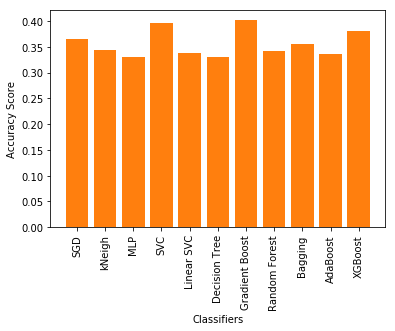

In [162]:
# Plotting accuracy comparison

plt.bar(scores['Classifier'], scores['Accuracy'], color='C1')
plt.xticks(rotation=90)
plt.ylabel('Accuracy Score')
plt.xlabel('Classifiers');

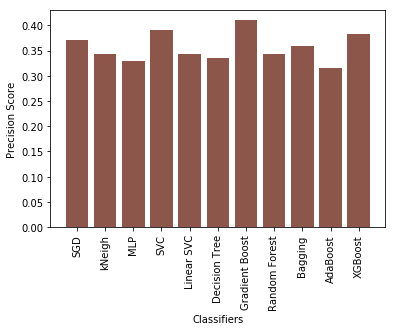

In [163]:
# Plotting precision comparison

plt.bar(scores['Classifier'], scores['Precision'], color='C5')
plt.xticks(rotation=90)
plt.ylabel('Precision Score')
plt.xlabel('Classifiers');

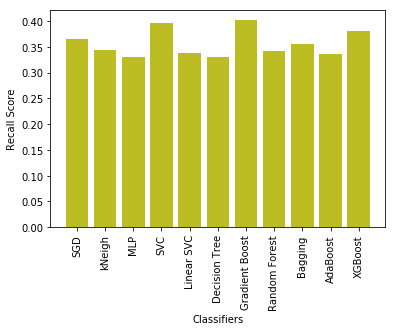

In [164]:
# Plotting recall comparison

plt.bar(scores['Classifier'], scores['Recall'], color='C8')
plt.xticks(rotation=90)
plt.ylabel('Recall Score')
plt.xlabel('Classifiers');

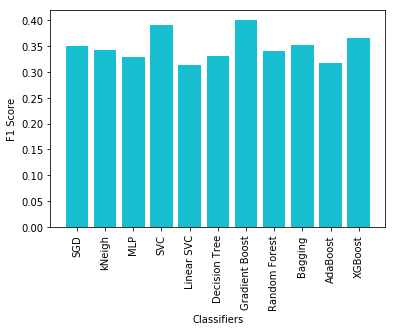

In [165]:
# Plotting F1 comparison

plt.bar(scores['Classifier'], scores['F1'], color='C9')
plt.xticks(rotation=90)
plt.ylabel('F1 Score')
plt.xlabel('Classifiers');

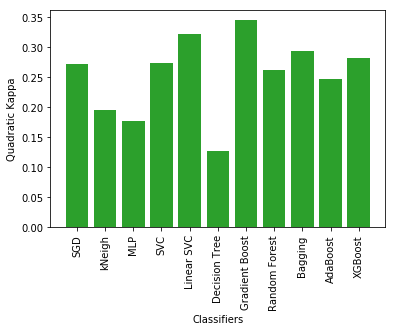

In [166]:
# Plotting Cohen's kappa comparison

plt.bar(scores['Classifier'], scores['Quadratic Kappa'], color='C2')
plt.xticks(rotation=90)
plt.ylabel('Quadratic Kappa')
plt.xlabel('Classifiers');

### Top performer fine-tuning

In [293]:
# Use grid search https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/

## Additional insights

### Model application on dataset without sentiment and image analysis

#### Initial best performer

In [ ]:
# Dataset selection

from sklearn.preprocessing import Imputer

imputer = Imputer()

train_variables_blank = train_data.drop(['PetID', 
                                   'Name', 
                                   'AdoptionSpeed',
                                   'RescuerID', 
                                   'Description', 
                                   'Dog', 
                                   'Male', 
                                   'Healthy', 
                                   'Not vaccinated', 
                                   'Not dewormed', 
                                   'Not sterilized', 
                                   'Black', 
                                   'Breed1', 
                                   'Breed2', 
                                   'Breed Not Classified', 
                                   'Single_pic', 
                                   'Melaka',
                                   'Docsenti_magnitude',
                                   'Docsenti_score',
                                   'CNN_Adoption_Prediction'], 
                                  axis=1)

train_variables_blank = imputer.fit_transform(train_variables_blank)

train_targets_blank = train_data['AdoptionSpeed']

valid_variables_blank = valid_data.drop(['PetID', 
                                   'Name', 
                                   'AdoptionSpeed',
                                   'RescuerID', 
                                   'Description', 
                                   'Dog', 
                                   'Male', 
                                   'Healthy', 
                                   'Not vaccinated', 
                                   'Not dewormed', 
                                   'Not sterilized', 
                                   'Black', 
                                   'Breed1', 
                                   'Breed2', 
                                   'Breed Not Classified', 
                                   'Single_pic', 
                                   'Melaka',
                                   'Docsenti_magnitude',
                                   'Docsenti_score',
                                   'CNN_Adoption_Prediction'], 
                                  axis=1)

valid_variables_blank = imputer.fit_transform(valid_variables_blank)

valid_targets_blank = valid_data['AdoptionSpeed']

In [ ]:
# Model

#### Final best performer

### Model application on dataset with full dummy set

#### Initial best performer

In [ ]:
# Dataset selection

from sklearn.preprocessing import Imputer

imputer = Imputer()

train_variables_dumm = train_data.drop(['PetID', 
                                   'Name', 
                                   'AdoptionSpeed',
                                   'RescuerID', 
                                   'Description', 
                                   'Breed1', 
                                   'Breed2'], 
                                  axis=1)

train_variables_dumm = imputer.fit_transform(train_variables_dumm)

train_targets_dumm = train_data['AdoptionSpeed']

valid_variables_dumm = valid_data.drop(['PetID', 
                                   'Name', 
                                   'AdoptionSpeed',
                                   'RescuerID', 
                                   'Description', 
                                   'Breed1', 
                                   'Breed2'], 
                                  axis=1)

valid_variables_dumm = imputer.fit_transform(valid_variables_dumm)

valid_targets_dumm = valid_data['AdoptionSpeed']

In [ ]:
# Model

#### Final best performer